# Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importing the Dataset

In [2]:
df_train=pd.read_csv("credit_train.csv")
df_test=pd.read_csv("credit_test.csv")

# Reading the Dataset

In [3]:
df_train.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [4]:
df_train.shape

(100514, 19)

In [5]:
df_train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


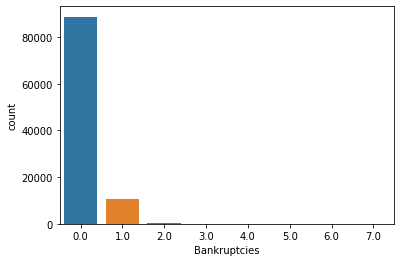

In [7]:
sns.countplot(x="Bankruptcies",data=df_train)

# Plotting each and every variable through Graph using Data Visualization

C:\Users\Robinhood\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Robinhood\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


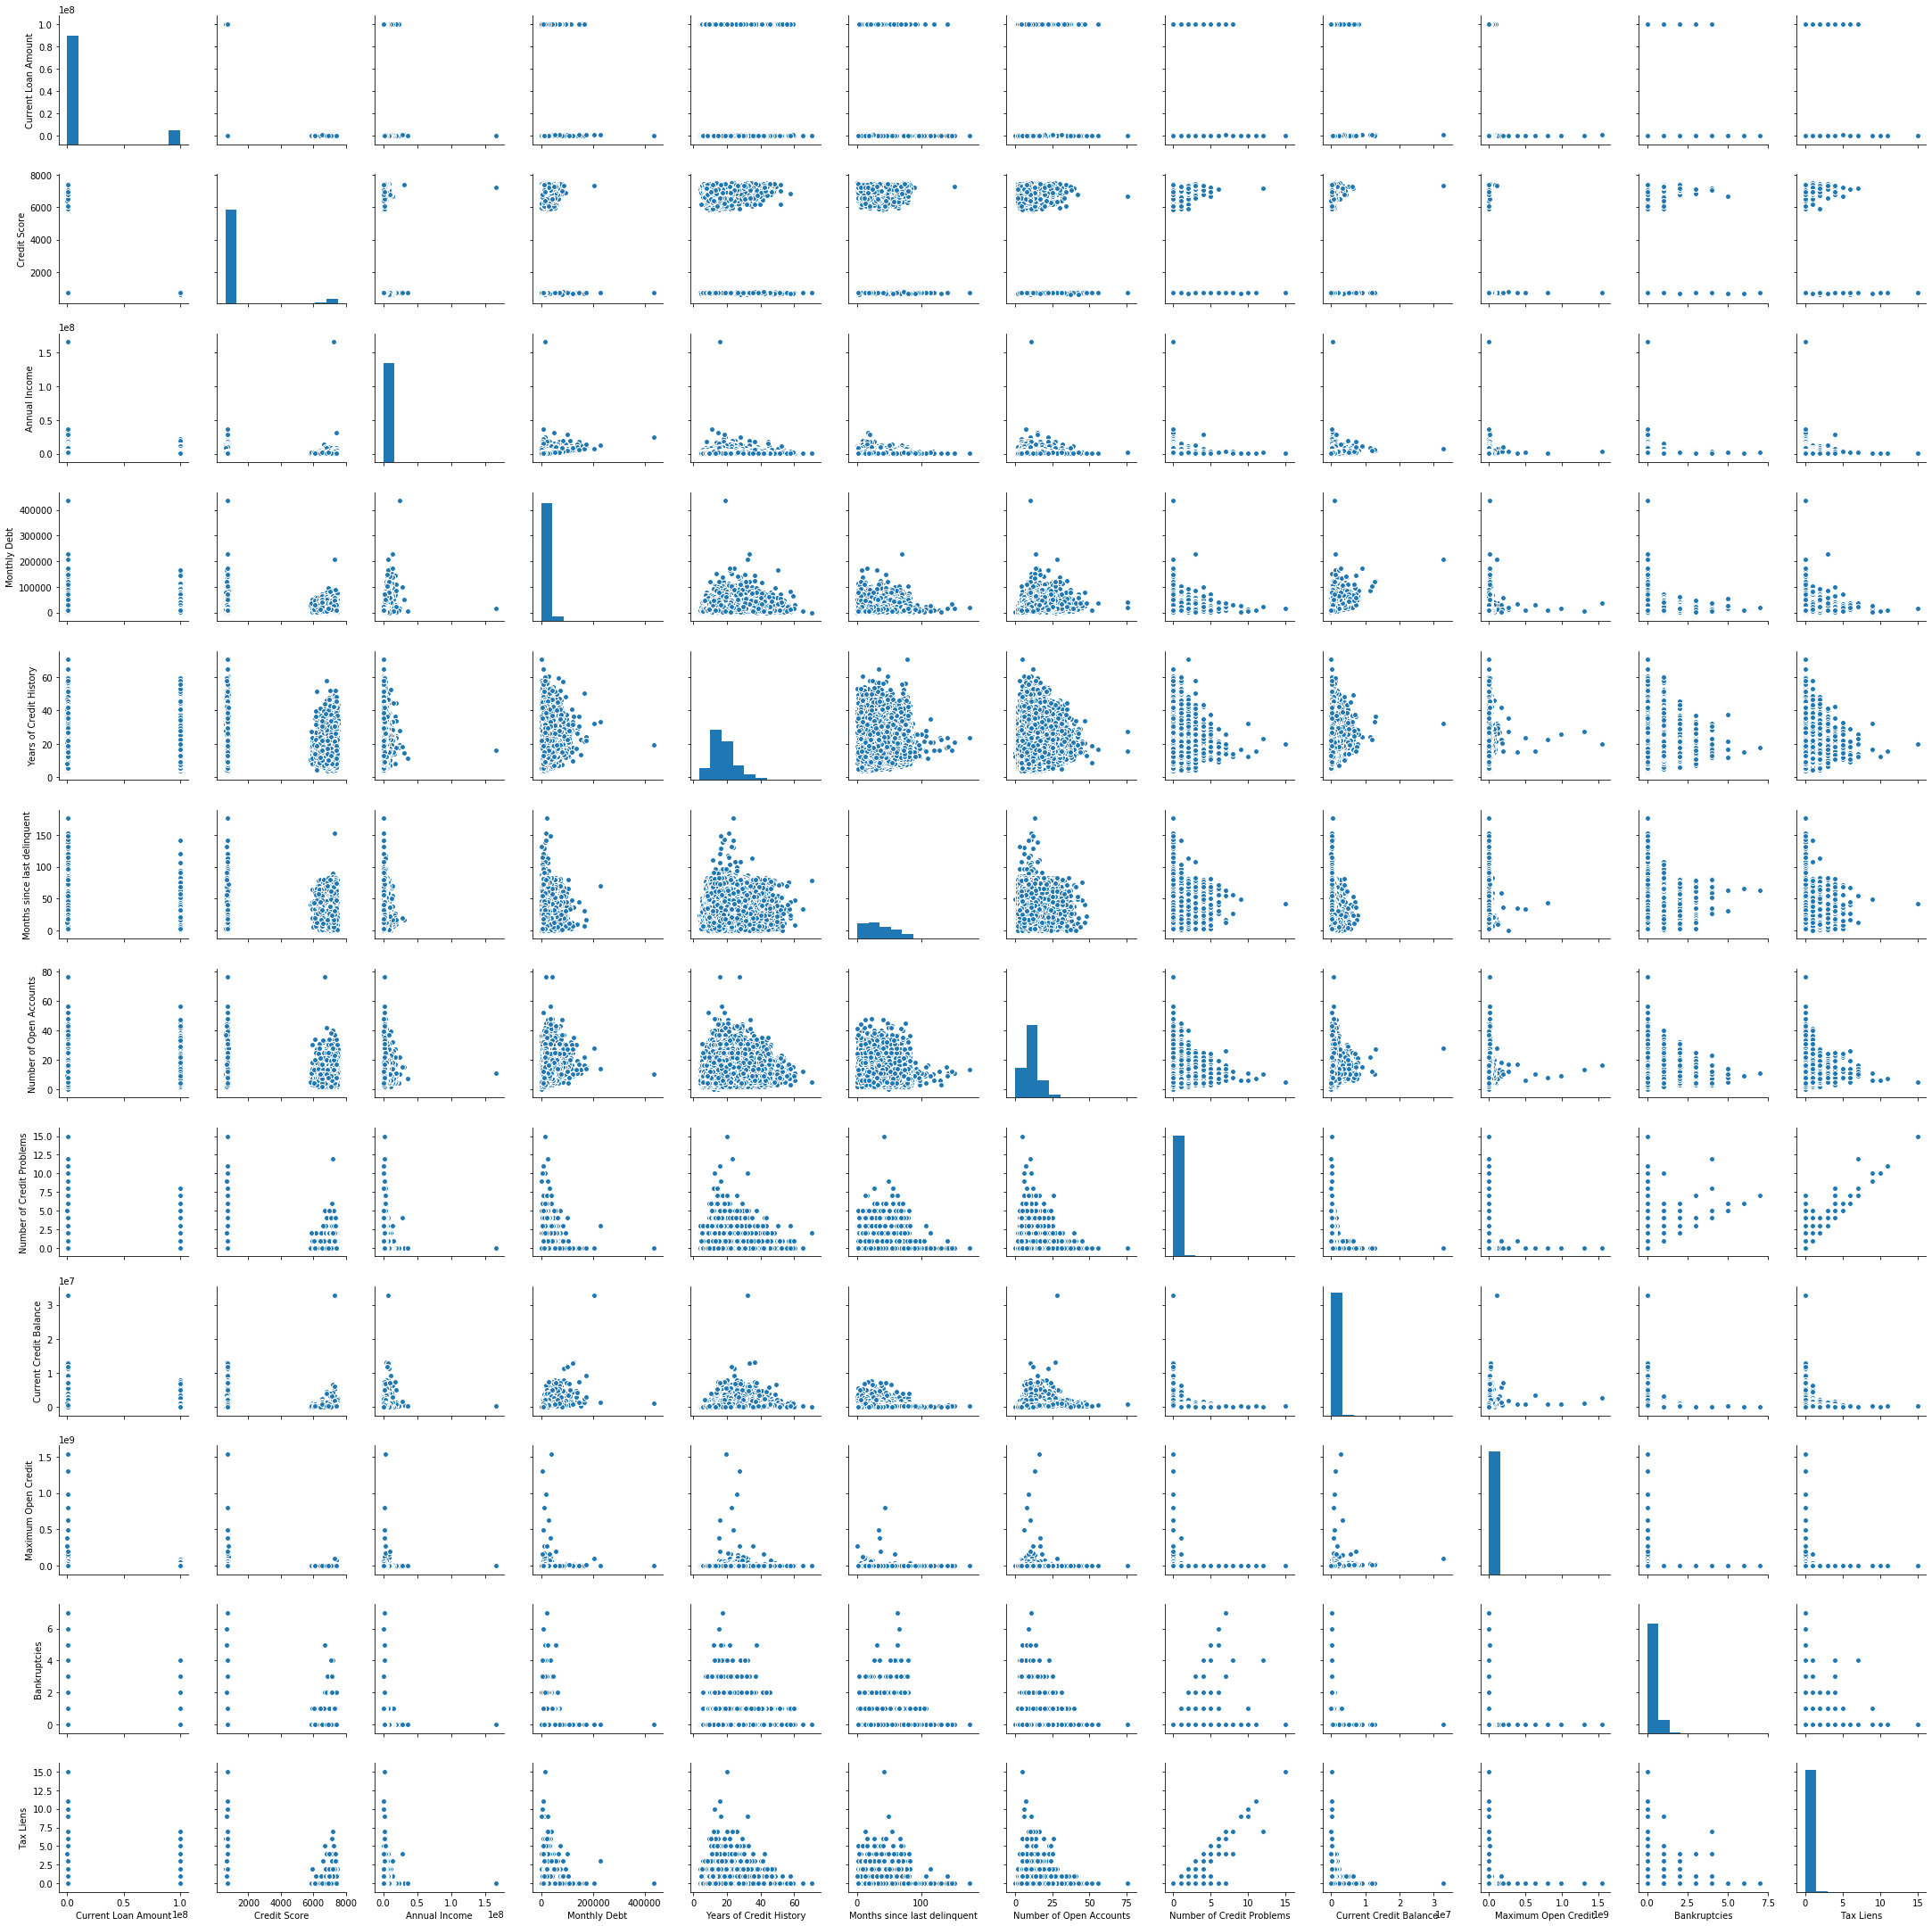

In [9]:
sns.pairplot(df_train)

# Checking the Correlation

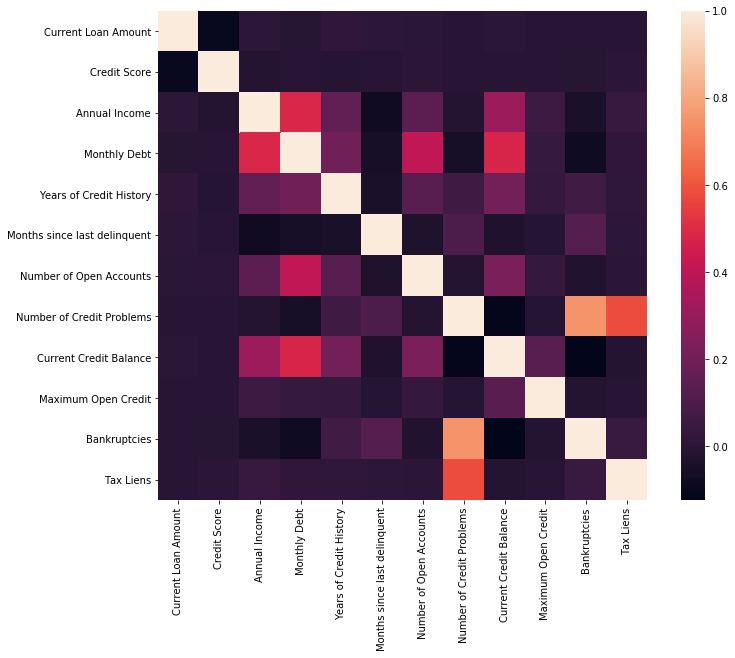

In [8]:
corrmat=df_train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,square=True)

In [10]:
df_train.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


# Dropping NA Values

In [11]:
df_train.dropna(inplace=True, subset=["Loan ID","Customer ID","Loan Status","Term","Home Ownership","Purpose","Years in current job"])

In [12]:
df_train.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    18344
Annual Income                   18344
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    50898
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

# Fill the NA values with the Mean

In [13]:
df_train.fillna(df_train.mean(), inplace=True)

In [148]:
df_train.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

# Create Dummy Variables

In [14]:
df_train_1=pd.get_dummies(df_train["Loan Status"],drop_first=True)
df_train_1.head(10)

,Fully Paid
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [15]:
df_train_2=pd.get_dummies(df_train["Term"],drop_first=True)
df_train_2.head(10)

,Short Term
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,1
9,1


In [16]:
df_train_3=pd.get_dummies(df_train["Home Ownership"],drop_first=True)
df_train_3.head(10)

,Home Mortgage,Own Home,Rent
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,1,0,0
6,1,0,0
7,1,0,0
8,0,0,1
9,0,0,1


In [17]:
df_train_4=pd.get_dummies(df_train["Purpose"],drop_first=True)
df_train_4.head(10)

,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Concatenating all the Datasets

In [18]:
df_train=pd.concat([df_train,df_train_1,df_train_2,df_train_3,df_train_4],axis=1)
df_train.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,...,0,0,0,0,0,0,0,0,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1071.957861,1.399077e+06,10+ years,Home Mortgage,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1071.957861,1.399077e+06,5 years,Rent,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,1071.957861,1.399077e+06,< 1 year,Home Mortgage,Buy House,...,0,0,0,0,0,0,0,0,0,0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.000000,2.559110e+06,2 years,Rent,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.000000,1.454735e+06,< 1 year,Rent,Debt Consolidation,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Fully Paid                      0
Short Term                      0
Home Mortgage                   0
Own Home                        0
Rent                            0
Buy House                       0
Buy a Car                       0
Debt Consolidation              0
Educational Expenses            0
Home Improvements               0
Medical Bills 

# Checking the type of classes in the Column

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95778 entries, 0 to 99998
Data columns (total 39 columns):
Loan ID                         95778 non-null object
Customer ID                     95778 non-null object
Loan Status                     95778 non-null object
Current Loan Amount             95778 non-null float64
Term                            95778 non-null object
Credit Score                    95778 non-null float64
Annual Income                   95778 non-null float64
Years in current job            95778 non-null object
Home Ownership                  95778 non-null object
Purpose                         95778 non-null object
Monthly Debt                    95778 non-null float64
Years of Credit History         95778 non-null float64
Months since last delinquent    95778 non-null float64
Number of Open Accounts         95778 non-null float64
Number of Credit Problems       95778 non-null float64
Current Credit Balance          95778 non-null float64
Maximum Open Credi

# Removing the Columns 

In [21]:
df_train=df_train.drop("Term",axis=1)
df_train=df_train.drop("Loan Status",axis=1)
df_train=df_train.drop("Customer ID",axis=1)
df_train=df_train.drop("Loan ID",axis=1)
df_train=df_train.drop("Purpose",axis=1)
df_train=df_train.drop("Debt Consolidation",axis=1)
df_train=df_train.drop("Home Ownership",axis=1)
df_train=df_train.drop("Years in current job",axis=1)

In [22]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
count,9.577800e+04,95778.000000,9.577800e+04,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,9.577800e+04,9.577800e+04,...,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,95778.000000,95778.00000
mean,1.182252e+07,1071.957861,1.399077e+06,18702.935046,18.000383,34.811074,11.182610,0.162323,2.969464e+05,7.640170e+05,...,0.010900,0.032492,0.005711,0.003477,0.001451,0.059429,0.000104,0.002903,0.000992,0.00119
std,3.185426e+07,1318.768504,9.844823e+05,12231.407409,6.804039,15.062334,5.020218,0.474337,3.782820e+05,8.542785e+06,...,0.103834,0.177303,0.075356,0.058862,0.038068,0.236427,0.010218,0.053797,0.031479,0.03448
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.836615e+05,711.000000,9.429748e+05,10442.210000,13.400000,34.000000,8.000000,0.000000,1.142470e+05,2.762540e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.169430e+05,733.000000,1.393650e+06,16434.620000,16.800000,34.811074,10.000000,0.000000,2.120685e+05,4.712840e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,5.288360e+05,750.000000,1.530531e+06,24254.592500,21.500000,34.811074,14.000000,0.000000,3.709560e+05,7.869840e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Logistic Regression

In [23]:
X=df_train.drop("Bankruptcies",axis=1)
y=df_train["Bankruptcies"]

In [24]:
from sklearn.cross_validation import train_test_split

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel=LogisticRegression()

# Label Encoder for y_train dataset

In [28]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

In [29]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions=logmodel.predict(X_test)

# Classification Report

In [31]:
from sklearn.metrics import classification_report

In [32]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_test=lab_enc.fit_transform(y_test)

In [33]:
classification_report(y_test, predictions)

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.89      1.00      0.94     17078\n          1       0.00      0.00      0.00        29\n          2       0.00      0.00      0.00      1941\n          3       0.00      0.00      0.00        84\n          4       0.00      0.00      0.00        17\n          5       0.00      0.00      0.00         4\n          6       0.00      0.00      0.00         2\n          7       0.00      0.00      0.00         1\n\navg / total       0.79      0.89      0.84     19156\n'

# Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[17078,     0,     0,     0,     0,     0,     0,     0],
       [   29,     0,     0,     0,     0,     0,     0,     0],
       [ 1941,     0,     0,     0,     0,     0,     0,     0],
       [   84,     0,     0,     0,     0,     0,     0,     0],
       [   17,     0,     0,     0,     0,     0,     0,     0],
       [    4,     0,     0,     0,     0,     0,     0,     0],
       [    2,     0,     0,     0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int64)

# Checking the Accuracy

In [70]:
from sklearn.metrics import accuracy_score
lr_accuracy=accuracy_score(y_test,predictions)
print(accuracy_score(y_test, predictions))

0.8934537481728962


# Decision Tree for Classification

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# Label Encoder for y_train dataset

In [73]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

In [74]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_pred=dt.predict(X_test)

In [76]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_test=lab_enc.fit_transform(y_test)

# Preparing Confusion Matrix, Classification Report

In [77]:
classification_report(y_test, y_pred)

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.99      0.99      0.99     21322\n          1       0.50      0.68      0.58        44\n          2       0.90      0.91      0.91      2439\n          3       0.68      0.68      0.68       110\n          4       0.58      0.48      0.52        23\n          5       0.75      0.75      0.75         4\n          6       1.00      0.50      0.67         2\n          7       1.00      1.00      1.00         1\n          8       0.00      0.00      0.00         0\n\navg / total       0.98      0.98      0.98     23945\n'

In [78]:
confusion_matrix(y_test, y_pred)

array([[21046,    28,   222,    21,     4,     1,     0,     0,     0],
       [   14,    30,     0,     0,     0,     0,     0,     0,     0],
       [  201,     2,  2219,    14,     3,     0,     0,     0,     0],
       [   15,     0,    19,    75,     1,     0,     0,     0,     0],
       [    9,     0,     3,     0,    11,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     3,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     1,     0,     1],
       [    0,     0,     0,     0,     0,     0,     0,     1,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int64)

# Checking the Precision

In [79]:
dt_accuracy=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test, y_pred))

0.9766548339945709


# Random Forest Classification

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Label Encoder for y_train and y_test dataset

In [82]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_test=lab_enc.fit_transform(y_test)

# Training the Algorithm

In [83]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Preparing Confusion Matrix, Classification Report and Check Accuracy

In [84]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
rf_accuracy=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test, y_pred))

[[16916     1   189     7     2     0     0     0]
 [   15    15     1     0     0     0     0     0]
 [   17     0  1883     6     0     0     0     0]
 [    5     0    32    40     1     0     0     0]
 [    2     0     8     0     8     0     0     0]
 [    2     0     1     0     0     2     0     0]
 [    1     0     0     0     0     0     1     0]
 [    0     0     1     0     0     0     0     0]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     17115
          1       0.94      0.48      0.64        31
          2       0.89      0.99      0.94      1906
          3       0.75      0.51      0.61        78
          4       0.73      0.44      0.55        18
          5       1.00      0.40      0.57         5
          6       1.00      0.50      0.67         2
          7       0.00      0.00      0.00         1

avg / total       0.99      0.98      0.98     19156

0.98480893714763


C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PCA Analysis

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# Label Encoder for y_train and y_test dataset

In [86]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_test=lab_enc.fit_transform(y_test)

In [87]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Checking the Accuracy Score

In [88]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
pca_accuracy=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test, y_pred))

0.8866151597410733


# Preparing Confusion Matrix and Classification Report

In [89]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16845     0   270     0     0     0     0     0]
 [   31     0     0     0     0     0     0     0]
 [ 1767     0   139     0     0     0     0     0]
 [   31     0    47     0     0     0     0     0]
 [    0     0    18     0     0     0     0     0]
 [    0     0     5     0     0     0     0     0]
 [    0     0     2     0     0     0     0     0]
 [    0     0     1     0     0     0     0     0]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94     17115
          1       0.00      0.00      0.00        31
          2       0.29      0.07      0.12      1906
          3       0.00      0.00      0.00        78
          4       0.00      0.00      0.00        18
          5       0.00      0.00      0.00         5
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         1

avg / total       0.83      0.89      0.85     19156



C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Plotting the Model using Accuracy of Different Models

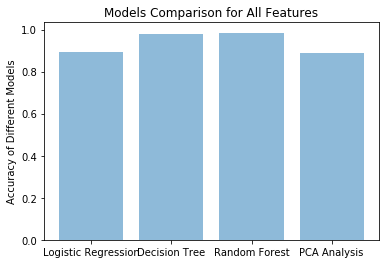

In [90]:
objects=("Logistic Regression","Decision Tree","Random Forest","PCA Analysis")
y_pos=np.arange(len(objects))
performance=[lr_accuracy, dt_accuracy, rf_accuracy, pca_accuracy]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy of Different Models')
plt.title('Models Comparison for All Features')


plt.show()